In [1]:
import numpy as np
import mesh_function as mf
import differentiate as dif
import decay_v3 as de
import sympy as sp
import scipy.special as sc
import VibFD as fd
import matplotlib.pyplot as plt
import Wave1D as wd
%matplotlib inline 

%load_ext autoreload

%autoreload 2

In [2]:
mf.test_mesh_function()

[3.67879441e-01 1.35335283e-01 4.97870684e-02 6.14421235e-06]
[3.67879441e-01 1.35335283e-01 4.97870684e-02 6.14421235e-06]


In [3]:
dif.test_differentiate()

In [4]:
de.test_solver_three_steps()

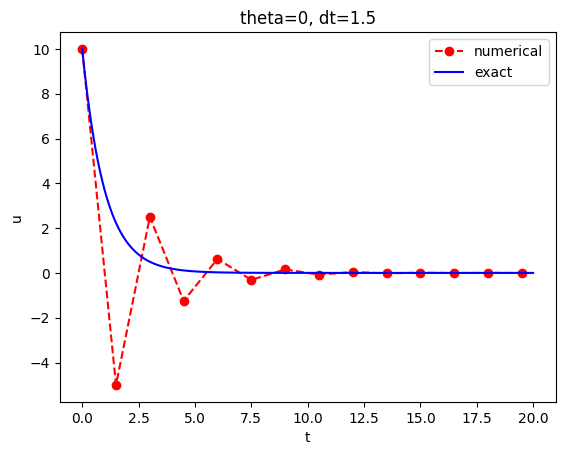

In [5]:
theta, I, a, T, dt = 0, 10, 1, 20, 1.5

de.plot_numerical_and_exact(theta, I, a, T, dt)

In [6]:
h = sp.Symbol('h')
A = sp.Matrix([[1,-2*h,2*h**2],[1,-h, h**2/2],[1,0,0]])
A.inv()

Matrix([
[      0,       0,       1],
[1/(2*h),    -2/h, 3/(2*h)],
[h**(-2), -2/h**2, h**(-2)]])

In [7]:
print(A[0,-2:])

Matrix([[-2*h, 2*h**2]])


In [8]:
C = np.zeros((6,6))
C = sp.Matrix(C)
for j,p in enumerate(range(-4,2)):
    for i in range(6):
        C[j,i] = (p*h)**i/sc.factorial(i)

In [9]:
C.inv()

Matrix([
[                      0,                    0,                     0,                       0,                1.0,                      0],
[                 0.05/h, -0.333333333333333/h,                 1.0/h,                  -2.0/h, 1.08333333333333/h,                  0.2/h],
[0.0833333333333333/h**2,            -0.5/h**2, 1.16666666666667/h**2, -0.333333333333333/h**2,         -1.25/h**2, 0.833333333333333/h**2],
[             -0.25/h**3,            1.75/h**3,             -5.5/h**3,                8.5/h**3,         -6.25/h**3,              1.75/h**3],
[              -1.0/h**4,             6.0/h**4,            -14.0/h**4,               16.0/h**4,          -9.0/h**4,               2.0/h**4],
[              -1.0/h**5,             5.0/h**5,            -10.0/h**5,               10.0/h**5,          -5.0/h**5,               1.0/h**5]])

In [10]:
w = 0.35
solver = fd.VibFD3(2000, 2*np.pi/w, w)
u = solver()
t = np.linspace(0,1, u.size)

/opt/homebrew/Caskroom/miniconda/base/envs/mat-mek/lib/python3.12/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:603: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/opt/homebrew/Caskroom/miniconda/base/envs/mat-mek/lib/python3.12/site-packages/scipy/sparse/linalg/_matfuncs.py:76: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  Ainv = spsolve(A, I)


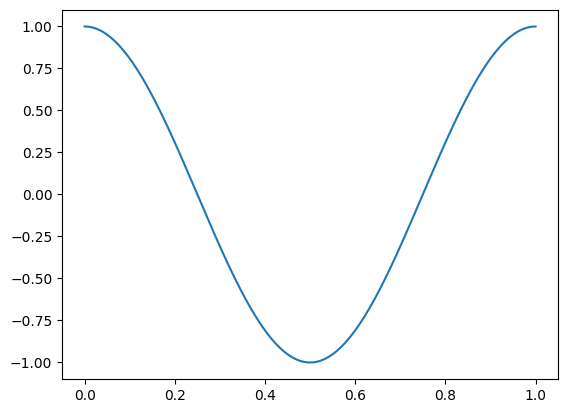

In [11]:
plt.plot(t,u)

In [14]:
wave = wd.Wave1D(N = 500)

In [23]:
plotdata = wave(Nt = 10000, ic=1, bc={'left':2, 'right':1})

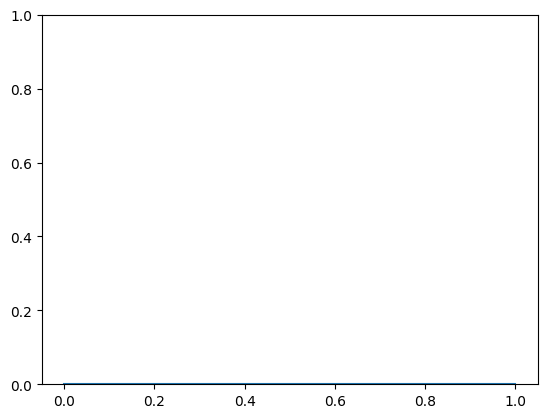

In [24]:
wave.animation(plotdata)